<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/polynomial_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lagrange Basis Polynomials

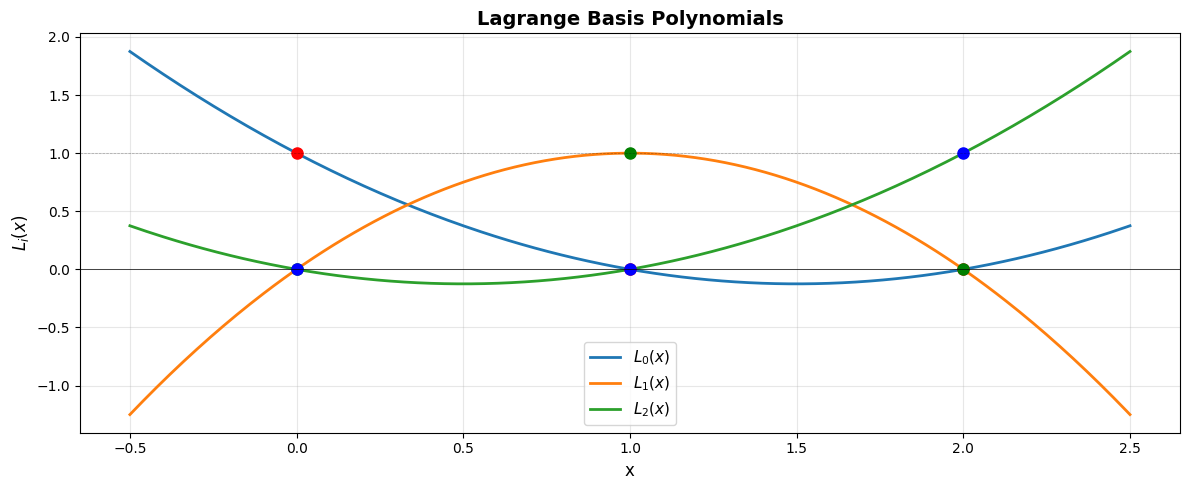

In [32]:
# Three points: (0, 1), (1, 3), (2, 2)
x_data = np.array([0.0, 1.0, 2.0])
y_data = np.array([1.0, 3.0, 2.0])

# Compute Lagrange basis polynomials
x = np.linspace(-0.5, 2.5, 300)

def lagrange_basis(x, x_data, i):
    """Compute i-th Lagrange basis polynomial"""
    L = np.ones_like(x)
    for j in range(len(x_data)):
        if j != i:
            L *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return L

plt.figure(figsize=(12, 5))

# Plot each basis polynomial
for i in range(len(x_data)):
    L_i = lagrange_basis(x, x_data, i)
    plt.plot(x, L_i, linewidth=2, label=f'$L_{i}(x)$')

# Mark the data points
plt.plot(x_data, [1, 0, 0], 'ro', markersize=8)
plt.plot(x_data, [0, 1, 0], 'go', markersize=8)
plt.plot(x_data, [0, 0, 1], 'bo', markersize=8)

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('$L_i(x)$', fontsize=12)
plt.title('Lagrange Basis Polynomials', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

## Lagrange Polynomial Interpolation

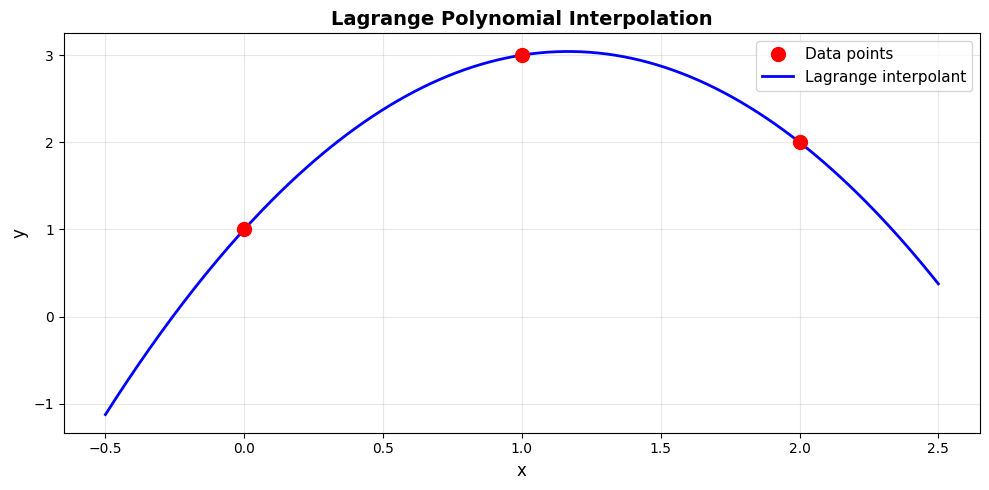

In [34]:
def lagrange_interpolation(x_data, y_data, x):
    """
    Compute Lagrange interpolating polynomial at points x.

    Parameters
    ----------
    x_data : array
        Data x-coordinates
    y_data : array
        Data y-coordinates
    x : array
        Points to evaluate interpolant

    Returns
    -------
    P : array
        Interpolated values
    """
    n = len(x_data)
    P = np.zeros_like(x, dtype=float)

    for i in range(n):
        # Compute i-th Lagrange basis polynomial
        L_i = np.ones_like(x, dtype=float)
        for j in range(n):
            if j != i:
                L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])

        # Add contribution: y_i * L_i(x)
        P += y_data[i] * L_i

    return P

# Test it
x_test = np.linspace(-0.5, 2.5, 300)
P = lagrange_interpolation(x_data, y_data, x_test)

plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, 'ro', markersize=10, label='Data points', zorder=3)
plt.plot(x_test, P, 'b-', linewidth=2, label='Lagrange interpolant')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Lagrange Polynomial Interpolation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()